In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split


In [3]:
from matplotlib.colors import  ListedColormap
import matplotlib.ticker as mtick

In [4]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [5]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH','MIN', ]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6', '#d6d4a0',]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941),
 (0.8392156862745098, 0.8313725490196079, 0.6274509803921569)]

In [6]:
vorder1 = ['Versatile VPRO', 'Positive VPRO', 'Negative VPRO',  ]
vpalette1 = [gpalette[1], gpalette[0], gpalette[3], gpalette[4], ]
vpalette1 = ['#5e392f', gpalette[1], gpalette[3],  ]
vpalette1 = [
    '#5E392F', 
    '#DC267F',
    #'#FE6100',
    '#648FFF',
    #'#785EF0',
]
print (vorder1)
sns.color_palette(vpalette1)

['Versatile VPRO', 'Positive VPRO', 'Negative VPRO']


[(0.3686274509803922, 0.2235294117647059, 0.1843137254901961),
 (0.8627450980392157, 0.14901960784313725, 0.4980392156862745),
 (0.39215686274509803, 0.5607843137254902, 1.0)]

In [7]:
morder

['EXOENZYME', 'OVERFLOW', 'ROS', 'MIXOTROPH', 'MIN']

In [8]:
mmap = {
    'EXOENZYME' : 'E', 
    'EXOENZYME-MIXOTROPH' : 'EM' , 
    'EXOENZYME-ROS' : 'ER',
       'EXOENZYME-ROS-MIXOTROPH' : 'ERM', 
    'MIN' : '-', 
    'MIXOTROPH' : 'M',
    'OVERFLOW' : 'O',
       'OVERFLOW-EXOENZYME' : 'EO',
    'OVERFLOW-EXOENZYME-MIXOTROPH' : 'EOM',
       'OVERFLOW-MIXOTROPH' : 'OM',
    'OVERFLOW-ROS' : 'OR', 
    'OVERFLOW-ROS-EXOENZYME' : 'EOR',
       'OVERFLOW-ROS-MIXOTROPH' : 'ORM', 
    'ROS' : 'R', 
    'ROS-MIXOTROPH' : 'RM',
       'ROS-MIXOTROPH-OVERFLOW-EXOENZYME' : 'EORM',
}

In [9]:
import os
import glob
dpath = '../results/final/het/'
#glob.glob(os.path.join(dpath, 'versatile_vpros_*'))

In [10]:
def _readvfile(fname):
    for category in ['add', 'extend', 'round2', 'init']:
        if category in fname:
            break
    print (fname, category)
    df = pd.read_csv(fname)
    df['Phase'] = category
    return df
vpro_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath, 'versatile_vpros_*'))], ignore_index=True)


../results/final/het\versatile_vpros_monte_add_het_clean.csv add
../results/final/het\versatile_vpros_monte_het_add_100per_vpro_EXOENZYME.csv add
../results/final/het\versatile_vpros_monte_het_add_100per_vpro_OVERFLOW.csv add
../results/final/het\versatile_vpros_monte_het_add_100per_vpro_ROS.csv add
../results/final/het\versatile_vpros_monte_het_clean.csv init
../results/final/het\versatile_vpros_monte_het_extend_100per_vpro_EXOENZYME-MIXOTROPH.csv extend
../results/final/het\versatile_vpros_monte_het_extend_100per_vpro_EXOENZYME-ROS-MIXOTROPH.csv extend
../results/final/het\versatile_vpros_monte_het_extend_100per_vpro_EXOENZYME-ROS.csv extend
../results/final/het\versatile_vpros_monte_het_extend_100per_vpro_EXOENZYME.csv extend
../results/final/het\versatile_vpros_monte_het_extend_100per_vpro_MIN.csv extend
../results/final/het\versatile_vpros_monte_het_extend_100per_vpro_MIXOTROPH.csv extend
../results/final/het\versatile_vpros_monte_het_extend_100per_vpro_OVERFLOW-EXOENZYME-MIXOTROP

In [11]:
vpro_df.VPRO = vpro_df.VPRO.str.replace('_monte_', '' ,regex=False)

In [12]:
vpro_df

,model,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction,Versatile,Phase
0,EXOENZYME,vpro_11_62_EXOENZYME_C1_15,0,0,0.0,0.0,0.0,3,0,3,False,add
1,EXOENZYME,vpro_11_62_EXOENZYME_C1_20,0,1,0.0,0.0,2.0,25,2,25,True,add
2,EXOENZYME,vpro_11_62_EXOENZYME_C1_22,0,0,0.0,0.0,0.0,6,0,6,False,add
3,EXOENZYME,vpro_11_62_EXOENZYME_C1_32,0,2,0.0,0.0,0.0,3,0,3,False,add
4,EXOENZYME,vpro_11_62_EXOENZYME_C1_37,0,6,0.0,0.0,0.0,7,0,7,False,add
...,...,...,...,...,...,...,...,...,...,...,...,...
38907,ROS,vpro_2_19_33_ROS_C0_988_36_ROS,0,9,0.0,0.0,0.0,0,0,0,False,round2
38908,ROS,vpro_2_19_33_ROS_C0_988_48_ROS,0,6,0.0,0.0,0.0,1,0,1,False,round2
38909,ROS,vpro_2_19_33_ROS_C0_988_61_ROS,0,0,0.0,0.0,0.0,4,0,4,False,round2
38910,ROS,vpro_2_19_33_ROS_C0_988_65_ROS,0,2,0.0,0.0,0.0,4,0,4,False,round2


In [13]:
vpro_df = vpro_df.groupby(['model', 'Phase', 'VPRO', ]).sum().reset_index()

In [14]:
vpro_df['Versatile'] = vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1)

In [15]:
vpro_df['simulations_per_VPRO']  = vpro_df[gorder].sum(axis=1)

In [16]:
vpro_df['Versatile_STR'] = vpro_df.Versatile.map({True: 'Versatile VPRO',False: 'Non-Versatile VPRO',  })
vpro_df.loc[vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Positive VPRO'
vpro_df.loc[~vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'
vpro_df.loc[~vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'



In [17]:
vorder = ['Non-Versatile VPRO', 'Versatile VPRO', ]
vpalette = [ '#FF8E8F', '#9c110b']
vpalette = [ 'black', '#9c110b']

sns.color_palette(vpalette)

[(0.0, 0.0, 0.0),
 (0.611764705882353, 0.06666666666666667, 0.043137254901960784)]

In [18]:
vpro_df['MODEL'] = vpro_df.model.map(mmap)
for m in morder:
    vpro_df[m] = vpro_df.model.str.contains(m)

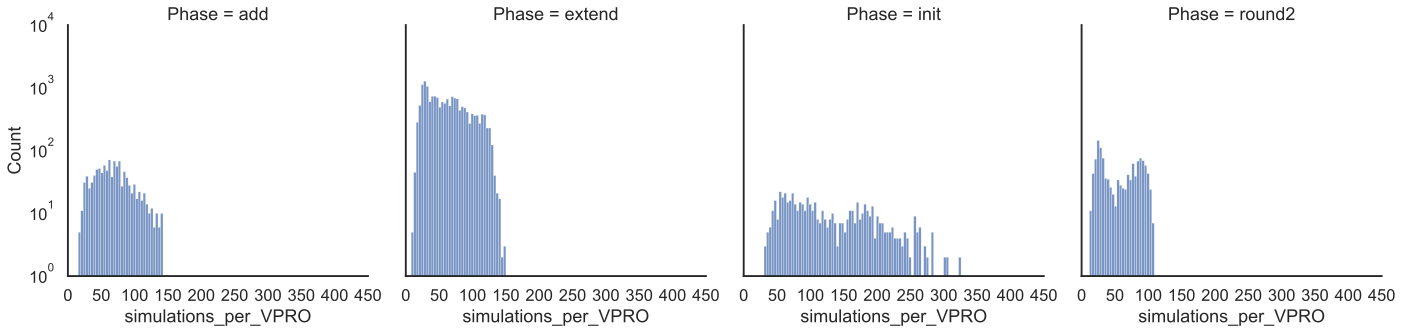

In [19]:
sns.set_context('talk')
sns.displot(
    data=vpro_df,
    col='Phase', 
    x='simulations_per_VPRO',
    #aspect=3,
    #log_scale=True,
    facet_kws=dict(sharex=False),
).set(yscale='log')

In [20]:
vpro_df.groupby('Versatile_STR').simulations_per_VPRO.describe().T

Versatile_STR,Negative VPRO,Positive VPRO,Versatile VPRO
count,14386.000000,1148.000000,4242.000000
mean,51.285277,109.688153,96.740453
std,25.746894,33.700749,30.875717
min,8.000000,24.000000,17.000000
25%,30.000000,95.000000,77.000000
50%,46.000000,112.000000,94.000000
75%,68.000000,121.000000,113.000000
max,301.000000,427.000000,366.000000


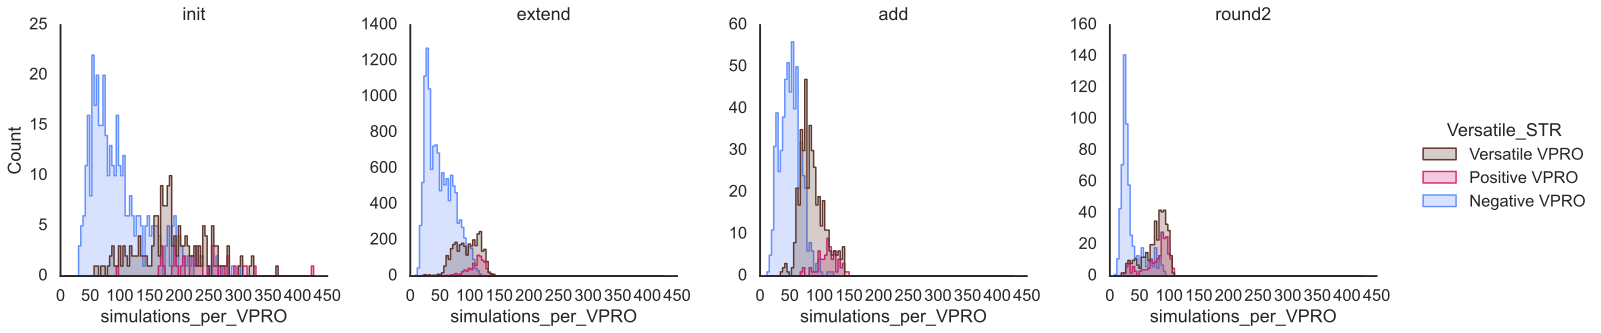

In [21]:
sns.set_context('talk')
g = sns.displot(
    data=vpro_df,
    col='Phase', col_order=['init', 'extend', 'add', 'round2'],
    hue='Versatile_STR', palette=vpalette1, hue_order=vorder1,
    x='simulations_per_VPRO', #multiple='stack',
    element='step', #fill=False,
    
    #aspect=3,
    #log_scale=True,
    facet_kws=dict(sharex=False, sharey=False),
)#.set(yscale='log').
g.set_titles(col_template='{col_name}')

In [22]:
vpro_df.loc[vpro_df.simulations_per_VPRO.le(20)].shape, vpro_df.shape

((544, 20), (19776, 20))

In [23]:
vpro_df.groupby(['Phase', ]).size()

Phase
add        1070
extend    16874
init        610
round2     1222
dtype: int64

In [24]:
count_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend'])].groupby(['model'])[gorder].sum().reset_index()
count_df['MODEL'] = count_df.model.map(mmap)
for m in morder:
    count_df[m] = count_df.model.str.contains(m)
count_df

count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,MIN
0,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,True,False,False,False,False
1,EXOENZYME-MIXOTROPH,82.0,3924.0,379,12798,32532,5247.0,EM,True,False,False,True,False
2,EXOENZYME-ROS,1776.0,12265.0,14,15275,24386,10494.0,ER,True,False,True,False,False
3,EXOENZYME-ROS-MIXOTROPH,3654.0,13799.0,33,26977,29094,14015.0,ERM,True,False,True,True,False
4,MIN,0.0,0.0,16,16142,6651,0.0,-,False,False,False,False,True
5,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,False,False,False,True,False
6,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False,False
7,OVERFLOW-EXOENZYME,882.0,18743.0,11,19872,54900,11675.0,EO,True,True,False,False,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,1629.0,21806.0,786,20621,61691,14339.0,EOM,True,True,False,True,False
9,OVERFLOW-MIXOTROPH,47.0,2509.0,240,36987,56449,3214.0,OM,False,True,False,True,False


In [25]:
count_ver_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend']) & vpro_df.Versatile].groupby(['model'])[gorder].sum().reset_index()
count_ver_df['MODEL'] = count_ver_df.model.map(mmap)
for m in morder:
    count_ver_df[m] = count_ver_df.model.str.contains(m)
count_ver_df



,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,MIN
0,EXOENZYME,37.0,5675.0,4,3131,5080,2886.0,E,True,False,False,False,False
1,EXOENZYME-MIXOTROPH,3.0,2672.0,286,1620,4975,2263.0,EM,True,False,False,True,False
2,EXOENZYME-ROS,252.0,10188.0,7,4859,6417,4757.0,ER,True,False,True,False,False
3,EXOENZYME-ROS-MIXOTROPH,269.0,13140.0,4,7174,7837,7901.0,ERM,True,False,True,True,False
4,MIXOTROPH,0.0,12.0,0,56,162,84.0,M,False,False,False,True,False
5,OVERFLOW,78.0,1263.0,2,10620,10246,1389.0,O,False,True,False,False,False
6,OVERFLOW-EXOENZYME,25.0,13098.0,2,5088,11199,4865.0,EO,True,True,False,False,False
7,OVERFLOW-EXOENZYME-MIXOTROPH,5.0,12317.0,259,5035,9789,4462.0,EOM,True,True,False,True,False
8,OVERFLOW-MIXOTROPH,30.0,2361.0,102,10526,14212,1958.0,OM,False,True,False,True,False
9,OVERFLOW-ROS,711.0,1775.0,8,13444,7964,5019.0,OR,False,True,True,False,False


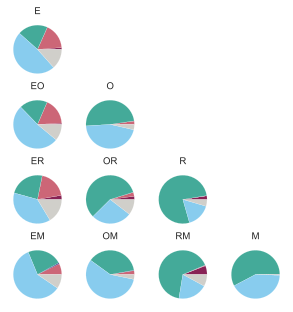

In [26]:
sns.set_context('paper')
fig, axes = plt.subplots(4,4, figsize=(5,5))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder[:-1]):
    for i2,m2 in enumerate(morder[:-1]):
        if i1 >= i2:
            othercols = [m for m in morder if m not in [m1, m2]]
            tmpdf =count_df.loc[count_df[m1] & count_df[m2] & ~count_df[othercols].any(axis=1) ]
            tmpdf.index = tmpdf.MODEL
            t=tmpdf[gorder].T.squeeze()
            #_wedges, labels, percentages = 
            axes[i1,i2].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
               wedgeprops={'linewidth': 0.1, 'edgecolor': 'white'},
                                                           #labels=t.index, autopct='%1.1f%%', 
                  )
            axes[i1,i2].set(title=tmpdf.MODEL.unique()[0])
        else: 
            axes[i1,i2].axis('off')
            
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


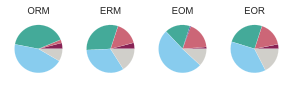

In [27]:
sns.set_context('paper')
fig, axes = plt.subplots(1,4, figsize=(5,5))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder[:-1]):
    #for i2,m2 in enumerate(morder[:-1]):
        othercols = [m for m in morder[:-1] if m not in [m1]]
        tmpdf =count_df.loc[~count_df[m1] & count_df[othercols].all(axis=1) ]
        tmpdf.index = tmpdf.MODEL
        #print(tmpdf)
        t=tmpdf[gorder].T.squeeze()
    
        #_wedges, labels, percentages = 
        axes[i1].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
           wedgeprops={'linewidth': 0.1, 'edgecolor': 'white'},
                                                       #labels=t.index, autopct='%1.1f%%', 
              )
        axes[i1].set(title=tmpdf.MODEL.unique()[0])
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


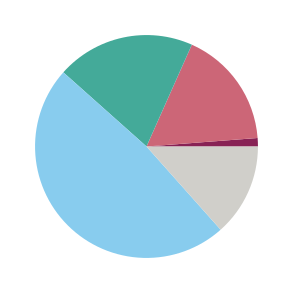

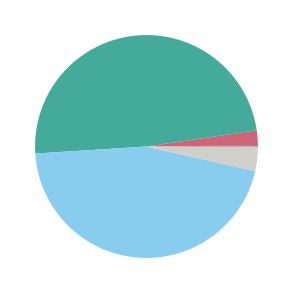

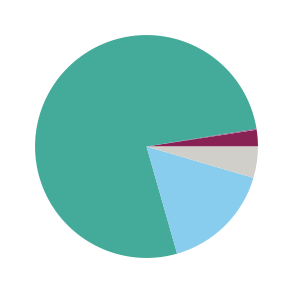

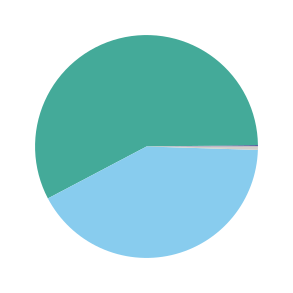

In [28]:
sns.set_context('paper')
for i1,m1 in enumerate(morder[:-1]):
    tmpdf =count_df.loc[count_df.model.isin([m1]) ]
    t=tmpdf[gorder].T.squeeze()

    fig, ax = plt.subplots(1,1, figsize=(5,5))# , sharex=True)# , sharey=True)
    #_wedges, labels, percentages = 
    ax.pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
       wedgeprops={'linewidth': 0.01, 'edgecolor': 'white'},
                                                   #labels=t.index, autopct='%1.1f%%', 
          )
    plt.show()
        #axes[i1].set(title=tmpdf.MODEL.unique()[0])
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


[Text(0.5, 1.0, '-')]

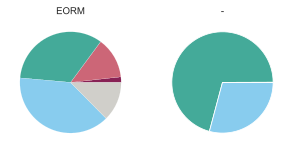

In [29]:
sns.set_context('paper')
fig, axes = plt.subplots(1,2, figsize=(5,5))# , sharex=True)# , sharey=True)
tmpdf =count_df.loc[count_df[morder[:-1]].all(axis=1) ]
tmpdf.index = tmpdf.MODEL
#print(tmpdf)
t=tmpdf[gorder].T.squeeze()

#_wedges, labels, percentages = 
axes[0].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
           wedgeprops={'linewidth': 0.1, 'edgecolor': 'white'},
                                               #labels=t.index, autopct='%1.1f%%', 
      )
axes[0].set(title=tmpdf.MODEL.unique()[0])
#tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


tmpdf =count_df.loc[~count_df[morder[:-1]].any(axis=1) ]
tmpdf.index = tmpdf.MODEL
#print(tmpdf)
t=tmpdf[gorder].T.squeeze()

#_wedges, labels, percentages = 
axes[1].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
   #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                               #labels=t.index, autopct='%1.1f%%', 
      )
axes[1].set(title=tmpdf.MODEL.unique()[0])
#tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


In [30]:
vorder1 = ['Versatile VPRO', 'Positive VPRO', 'Negative VPRO',  ]
vpalette1 = [gpalette[1], gpalette[0], gpalette[3], gpalette[4], ]
vpalette1 = ['#5e392f', gpalette[1], gpalette[3],  ]
vpalette1 = [
    '#5E392F', 
    '#DC267F',
    #'#FE6100',
    '#648FFF',
    #'#785EF0',
]
print (vorder1)
sns.color_palette(vpalette1)

['Versatile VPRO', 'Positive VPRO', 'Negative VPRO']


[(0.3686274509803922, 0.2235294117647059, 0.1843137254901961),
 (0.8627450980392157, 0.14901960784313725, 0.4980392156862745),
 (0.39215686274509803, 0.5607843137254902, 1.0)]

In [31]:
sns.set_context('paper')

In [32]:
vcount_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend'])
    ].pivot_table(
        index='MODEL', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [33]:
vcount_df = vcount_df.reindex(columns=vorder1)
vcount_df = vcount_df.sort_values(by=vorder1,ascending=False)

<Axes: title={'center': 'VPROs per model'}, xlabel='MODEL', ylabel='number of VPROs'>

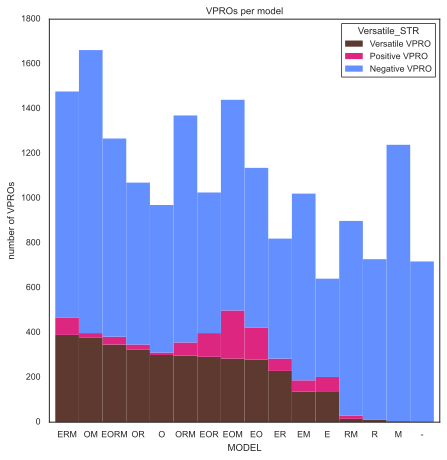

In [34]:
vcount_df.plot(
    kind='bar', stacked=True, color=vpalette1, width=1, figsize=(7,7), rot=0, lw=0.01, ylabel='number of VPROs', title='VPROs per model'
)

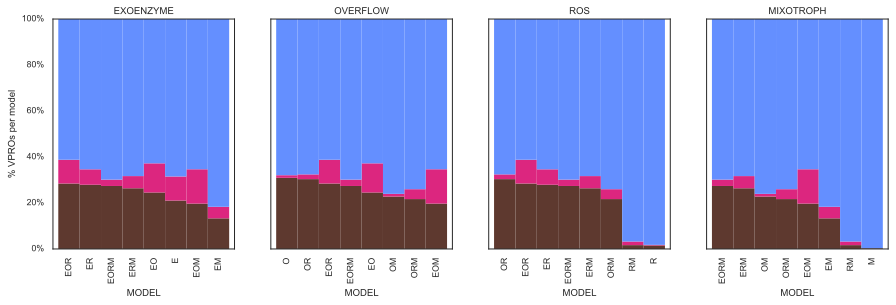

In [35]:
fig, axes = plt.subplots(1,4, figsize=(15,4) , sharey=True)# , sharey=True)

for m, ax in zip(morder[:-1], axes):
    
    vcdf = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) & vpro_df[m]
    ].pivot_table(
        index='MODEL', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )    
    vcdf = vcdf.reindex(columns=vorder1)
    vcdf = vcdf.div(vcdf.sum(axis=1), axis=0) * 100
    vcdf = vcdf.sort_values(by=vorder1,ascending=False)
    vcdf.plot(
        kind='bar', stacked=True, color=vpalette1, width=1, #figsize=(7,7), 
        #rot=0, 
        lw=0.01, ax=ax, legend=False, title=m, ylabel='% VPROs per model'
        
    )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    

In [109]:
vcount1_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder[:-1])
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [120]:
vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder[:-1])&
        vpro_df.Versatile_STR.isin(['Versatile VPRO'])
].groupby(['model', 'Versatile_STR']).size()

model      Versatile_STR 
EXOENZYME  Versatile VPRO    135
MIXOTROPH  Versatile VPRO      4
OVERFLOW   Versatile VPRO    300
ROS        Versatile VPRO     11
dtype: int64

In [136]:
vpro_df

,model,Phase,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,...,Versatile,simulations_per_VPRO,Versatile_STR,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,MIN,% positive
0,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_15,0,0,0.0,0.0,0.0,24,0,...,False,24.0,Negative VPRO,E,True,False,False,False,False,0.000000
1,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_20,0,1,2.0,0.0,9.0,77,9,...,True,89.0,Versatile VPRO,E,True,False,False,False,False,0.101124
2,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_22,0,0,0.0,0.0,0.0,27,0,...,False,27.0,Negative VPRO,E,True,False,False,False,False,0.000000
3,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_32,0,3,0.0,0.0,0.0,23,0,...,False,26.0,Negative VPRO,E,True,False,False,False,False,0.000000
4,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_37,0,29,0.0,0.0,0.0,35,0,...,False,64.0,Negative VPRO,E,True,False,False,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19771,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_82_9_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,0,0.0,0.0,0.0,209,0,...,False,209.0,Negative VPRO,EORM,True,True,True,True,False,0.000000
19772,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_86_79_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,19,4.0,0.0,0.0,237,0,...,False,260.0,Negative VPRO,EORM,True,True,True,True,False,0.000000
19773,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_95_6_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,16,56.0,236.0,1.0,0,237,...,False,309.0,Positive VPRO,EORM,True,True,True,True,False,0.766990
19774,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_97_54_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,127,123.0,0.0,17.0,15,17,...,True,282.0,Versatile VPRO,EORM,True,True,True,True,False,0.060284


In [147]:
t= vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder[:-1])
        
].groupby(['model'])[['simulations_per_VPRO', 'pos_interaction', 'neg_interaction', 'Neutral', 'Weak']].sum()
t['% pos'] = t['pos_interaction'] / t['simulations_per_VPRO'] 
t['% neg'] = t['neg_interaction'] / t['simulations_per_VPRO'] 
t['% neutral'] = t['Neutral'] / t['simulations_per_VPRO'] 
t['% Weak'] = t['Weak'] / t['simulations_per_VPRO'] 
t['% Weak/neutral'] = (t['Weak'] + t['Neutral']) / t['simulations_per_VPRO'] 

t

,simulations_per_VPRO,pos_interaction,neg_interaction,Neutral,Weak,% pos,% neg,% neutral,% Weak,% Weak/neutral
model,,,,,,,,,,
EXOENZYME,50890.0,9322,10227,24513,10217,0.183179,0.200963,0.481686,0.200766,0.682452
MIXOTROPH,36710.0,12,21175,15344,21119,0.000327,0.576818,0.417979,0.575293,0.993272
OVERFLOW,61208.0,1402,29814,27817,29791,0.022906,0.487093,0.454467,0.486717,0.941184
ROS,22671.0,566,17441,3634,17424,0.024966,0.769309,0.160293,0.768559,0.928852


In [110]:
vcount1_df = vcount1_df.reindex(columns=vorder1, index=morder[:-1])
#vcoun1_df = vcount1_df.sort_values(by=vorder1)

In [111]:
sns.set_context('poster')

In [112]:
vcount1_df.columns.name = None
vcount1_df.columns

Index(['Versatile VPRO', 'Positive VPRO', 'Negative VPRO'], dtype='object')

In [114]:
print(vcount1_df.sum(axis=1))


model
EXOENZYME     641
OVERFLOW      970
ROS           728
MIXOTROPH    1239
dtype: int64


In [124]:
vcount1_df = vcount1_df.div(vcount1_df.sum(axis=1), axis=0) * 100


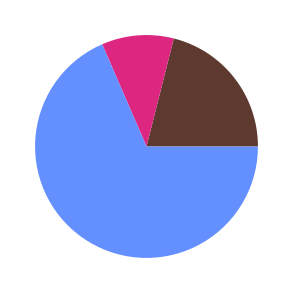

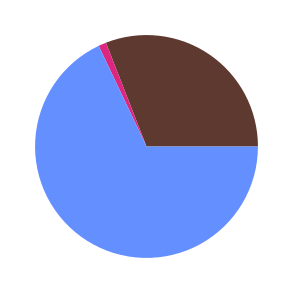

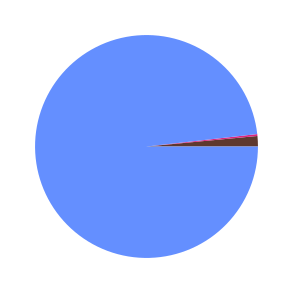

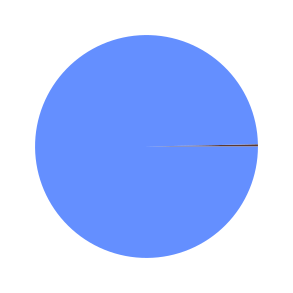

In [41]:
sns.set_context('paper')
for i1,m1 in enumerate(morder[:-1]):
    tmpdf =vcount1_df.loc[vcount1_df.index.isin([m1]) ]
    t=tmpdf.T.squeeze()

    fig, ax = plt.subplots(1,1, figsize=(5,5))# , sharex=True)# , sharey=True)
    #_wedges, labels, percentages = 
    ax.pie(t, colors=vpalette1, #title=tmpdf.MODEL.unique()[0],
       wedgeprops={'linewidth': 0.01, 'edgecolor': 'white'},
                                                   #labels=t.index, autopct='%1.1f%%', 
          )
    plt.show()
        #axes[i1].set(title=tmpdf.MODEL.unique()[0])
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


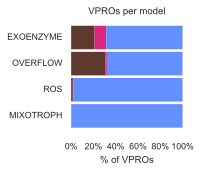

In [125]:
sns.set_context('paper')
vcount1_df.columns.name = None
vcount1_df.index.name = None
vcount1_df = vcount1_df.reindex(index=reversed(morder[:-1]))

vcount1_df.plot(
    kind='barh', stacked=True, color=vpalette1, width=0.9,  rot=0, lw=0, xlabel='% of VPROs', title='VPROs per model',
     figsize=(2,2), legend=False,
)
sns.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())


In [126]:
vcount1_df

,Versatile VPRO,Positive VPRO,Negative VPRO
MIXOTROPH,0.322841,0.000000,99.677159
ROS,1.510989,0.274725,98.214286
OVERFLOW,30.927835,1.134021,67.938144
EXOENZYME,21.060842,10.452418,68.486739


In [131]:
vpro_df['% positive'] = vpro_df.pos_interaction / vpro_df.simulations_per_VPRO

In [141]:
vpro_df.loc[vpro_df.Versatile & vpro_df.model.isin(morder[:-1]) & vpro_df.Phase.isin(['init', 'extend'])].groupby('model')['% positive'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
EXOENZYME,135.0,0.325533,0.168378,0.010101,0.116151,0.396694,0.436932,0.555556
MIXOTROPH,4.0,0.036718,0.028489,0.011905,0.023810,0.028595,0.041503,0.077778
OVERFLOW,300.0,0.055223,0.032956,0.008547,0.028882,0.049575,0.073070,0.172932
ROS,11.0,0.371830,0.280618,0.042105,0.148166,0.280374,0.672833,0.758491


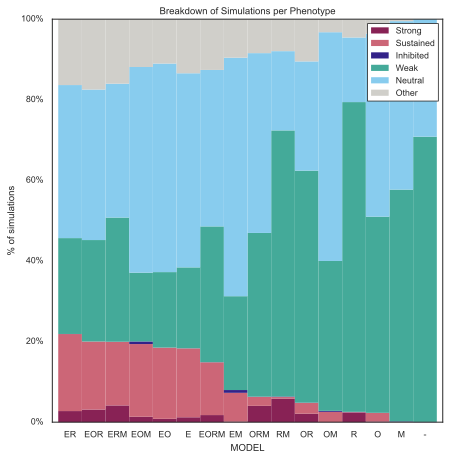

In [44]:

#cdf = count_df.copy()
cdf = count_df[gorder].div(count_df[gorder].sum(axis=1), axis=0) * 100

cdf.index=count_df.MODEL
cdf['pos'] = cdf[['Strong','Sustained']].sum(axis=1)
cdf['neg'] = cdf[['Inhibited','Weak']].sum(axis=1)
cdf = cdf.sort_values(by=['pos', 'neg',], ascending=False)
cdf[gorder].plot(
    kind='bar', stacked=True, color=gpalette, width=1, figsize=(7,7), rot=0, lw=0.01, 
    ylabel='% of simulations', title='Breakdown of Simulations per Phenotype'
)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())


In [45]:
count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,MIN
0,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,True,False,False,False,False
1,EXOENZYME-MIXOTROPH,82.0,3924.0,379,12798,32532,5247.0,EM,True,False,False,True,False
2,EXOENZYME-ROS,1776.0,12265.0,14,15275,24386,10494.0,ER,True,False,True,False,False
3,EXOENZYME-ROS-MIXOTROPH,3654.0,13799.0,33,26977,29094,14015.0,ERM,True,False,True,True,False
4,MIN,0.0,0.0,16,16142,6651,0.0,-,False,False,False,False,True
5,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,False,False,False,True,False
6,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False,False
7,OVERFLOW-EXOENZYME,882.0,18743.0,11,19872,54900,11675.0,EO,True,True,False,False,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,1629.0,21806.0,786,20621,61691,14339.0,EOM,True,True,False,True,False
9,OVERFLOW-MIXOTROPH,47.0,2509.0,240,36987,56449,3214.0,OM,False,True,False,True,False


In [71]:
sns.set_context('paper')

model
MIXOTROPH    36710.0
ROS          22671.0
OVERFLOW     61208.0
EXOENZYME    50890.0
dtype: float64


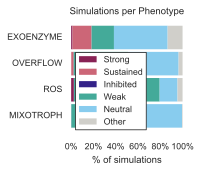

In [127]:
import matplotlib.ticker as mtick

cdf = count_df.loc[count_df['model'].isin(morder[:-1])].copy()
    
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder[:-1]))
print(cdf[gorder].sum(axis=1))
cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
cdf[gorder].plot(
    kind='barh', stacked=True, color=gpalette, width=0.9, figsize=(2,2), 
    #rot=0, 
    lw=0.01, #legend=False,
    xlabel='% of simulations', title='Simulations per Phenotype', ylabel='',
)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(bottom=True, left=True)

In [128]:
cdf

,Strong,Sustained,Inhibited,Weak,Neutral,Other
model,,,,,,
MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606
ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249
OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457
EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174


In [48]:
cdf = count_df.loc[count_df['model'].isin(morder[:-1])].copy()

,Strong,Sustained,Inhibited,Weak,Neutral,Other
model,,,,,,
EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174
OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457
ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249
MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606


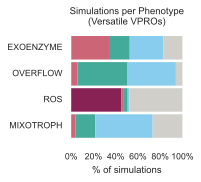

In [107]:
import matplotlib.ticker as mtick

cdf = count_ver_df.loc[count_ver_df['model'].isin(morder[:-1])].copy()
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder[:-1]))
cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
cdf[gorder].plot(
    kind='barh', stacked=True, color=gpalette, width=0.9, figsize=(2,2), 
    #rot=0, 
    lw=0.01, legend=False,
    xlabel='% of simulations', title='Simulations per Phenotype\n(Versatile VPROs)', ylabel='',
)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(bottom=True, left=True)

In [100]:
cdf

,Strong,Sustained,Inhibited,Weak,Neutral,Other
model,,,,,,
EXOENZYME,0.220068,33.753643,0.023791,18.622494,30.214715,17.165289
MIXOTROPH,0.000000,3.821656,0.000000,17.834395,51.592357,26.751592
OVERFLOW,0.330536,5.352148,0.008475,45.003814,43.418934,5.886092
ROS,45.172124,1.511335,0.000000,4.114190,1.595298,47.607053


In [106]:
count_ver_df.loc[count_ver_df.model.isin(morder[:-1])].groupby('model')[gorder].sum().sum(axis=1)


model
EXOENZYME    16813.0
MIXOTROPH      314.0
OVERFLOW     23598.0
ROS           1191.0
dtype: float64

In [51]:
count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,MIN
0,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,True,False,False,False,False
1,EXOENZYME-MIXOTROPH,82.0,3924.0,379,12798,32532,5247.0,EM,True,False,False,True,False
2,EXOENZYME-ROS,1776.0,12265.0,14,15275,24386,10494.0,ER,True,False,True,False,False
3,EXOENZYME-ROS-MIXOTROPH,3654.0,13799.0,33,26977,29094,14015.0,ERM,True,False,True,True,False
4,MIN,0.0,0.0,16,16142,6651,0.0,-,False,False,False,False,True
5,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,False,False,False,True,False
6,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False,False
7,OVERFLOW-EXOENZYME,882.0,18743.0,11,19872,54900,11675.0,EO,True,True,False,False,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,1629.0,21806.0,786,20621,61691,14339.0,EOM,True,True,False,True,False
9,OVERFLOW-MIXOTROPH,47.0,2509.0,240,36987,56449,3214.0,OM,False,True,False,True,False


In [52]:
count_ver_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH,MIN
0,EXOENZYME,37.0,5675.0,4,3131,5080,2886.0,E,True,False,False,False,False
1,EXOENZYME-MIXOTROPH,3.0,2672.0,286,1620,4975,2263.0,EM,True,False,False,True,False
2,EXOENZYME-ROS,252.0,10188.0,7,4859,6417,4757.0,ER,True,False,True,False,False
3,EXOENZYME-ROS-MIXOTROPH,269.0,13140.0,4,7174,7837,7901.0,ERM,True,False,True,True,False
4,MIXOTROPH,0.0,12.0,0,56,162,84.0,M,False,False,False,True,False
5,OVERFLOW,78.0,1263.0,2,10620,10246,1389.0,O,False,True,False,False,False
6,OVERFLOW-EXOENZYME,25.0,13098.0,2,5088,11199,4865.0,EO,True,True,False,False,False
7,OVERFLOW-EXOENZYME-MIXOTROPH,5.0,12317.0,259,5035,9789,4462.0,EOM,True,True,False,True,False
8,OVERFLOW-MIXOTROPH,30.0,2361.0,102,10526,14212,1958.0,OM,False,True,False,True,False
9,OVERFLOW-ROS,711.0,1775.0,8,13444,7964,5019.0,OR,False,True,True,False,False


In [53]:
cdf

,Strong,Sustained,Inhibited,Weak,Neutral,Other
model,,,,,,
EXOENZYME,0.220068,33.753643,0.023791,18.622494,30.214715,17.165289
OVERFLOW,0.330536,5.352148,0.008475,45.003814,43.418934,5.886092
ROS,45.172124,1.511335,0.000000,4.114190,1.595298,47.607053
MIXOTROPH,0.000000,3.821656,0.000000,17.834395,51.592357,26.751592


In [54]:
vcount_df

Versatile_STR,Versatile VPRO,Positive VPRO,Negative VPRO
MODEL,,,
ERM,390,78,1009
OM,379,19,1264
EORM,347,35,885
OR,325,22,723
O,300,11,659
ORM,297,59,1014
EOR,292,106,628
EOM,284,215,941
EO,279,144,713


In [55]:
vcount1_df

,Versatile VPRO,Positive VPRO,Negative VPRO
EXOENZYME,21.060842,10.452418,68.486739
OVERFLOW,30.927835,1.134021,67.938144
ROS,1.510989,0.274725,98.214286
MIXOTROPH,0.322841,0.000000,99.677159


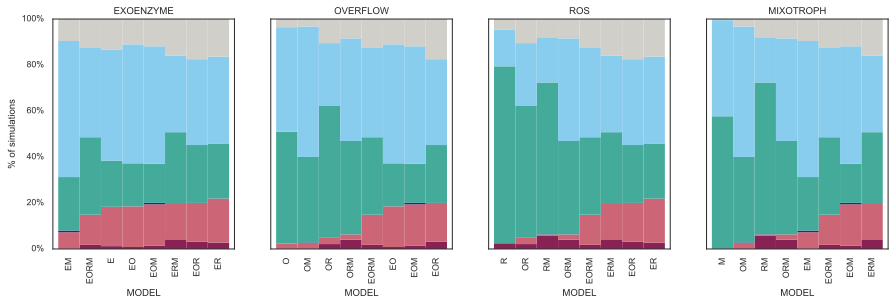

In [56]:
fig, axes = plt.subplots(1,4, figsize=(15,4) , sharey=True)# , sharey=True)

for m, ax in zip(morder[:-1], axes):
    
    cdf = count_df.loc[count_df[m]].copy()
    
    cdf.index=cdf.MODEL
    cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
    cdf['pos'] = cdf[['Strong','Sustained']].sum(axis=1)
    cdf['neg'] = cdf[['Inhibited','Weak']].sum(axis=1)
    cdf = cdf.sort_values(by=['pos', 'neg',])
    #cdf = cdf/ cdf[gorder].sum(axis=1)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=1, #figsize=(7,7), 
        #rot=0, 
        lw=0.01, ax=ax, legend=False, title=m, ylabel='% of simulations'
        
    )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    

In [57]:
stop

NameError: name 'stop' is not defined

In [ ]:
sns.set_context('paper')
fig, axes = plt.subplots(4,4, figsize=(10,10))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder[:-1]):
    for i2,m2 in enumerate(morder[:-1]):
        othercols = [m for m in morder if m not in [m1, m2]]
        tmpdf =vpro_df.loc[vpro_df[m1] & vpro_df[m2] & ~vpro_df[othercols].any(axis=1) & vpro_df.Phase.isin(['extend'])].sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=gorder, ascending=False)
        t=tmpdf[gorder]
        t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=axes[i1,i2],) #fontsize=50)
        axes[i1,i2].set(xticklabels=[])
        axes[i1,i2].set(title=tmpdf.MODEL.unique()[0])
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


In [ ]:
sns.set_context('paper')
fig, axes = plt.subplots(4,4, figsize=(10,10))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder[:-1]):
    for i2,m2 in enumerate(morder[:-1]):
        othercols = [m for m in morder if m not in [m1, m2]]
        tmpdf =vpro_df.loc[vpro_df[m1] & vpro_df[m2] & ~vpro_df[othercols].any(axis=1) & vpro_df.Phase.isin(['extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=gorder, ascending=False)
        t=tmpdf[gorder]
        t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=axes[i1,i2],) #fontsize=50)
        axes[i1,i2].set(xticklabels=[])
        axes[i1,i2].set(title=tmpdf.MODEL.unique()[0])
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


In [ ]:
sns.set_context('paper')
fig, axes = plt.subplots(1,4, figsize=(12,3), sharey=True)# , sharey=True)
for i1,m1 in enumerate(morder[:-1]):
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=gorder, ascending=False)
        t=tmpdf[gorder]
        t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=axes[i1],) #fontsize=50)
        axes[i1].set(xticklabels=[], ylabel='simulations per VPRO', xlabel='VPRO'
                    )
        axes[i1].set(title=m1)
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
sns.despine(left=True)

In [ ]:
plt.show()